# Case Study - Portfolio Optimization
In this case study, we will build two $10,000 investment portfolios containing eight stocks. The *first portfolio* will have an *equal weighting between the stocks*. The *second portfolio* will then be optimized with a *weighting allocation* that provides the best return, adjusted for risk. To build these two portfolios, we will:

1. Import two years of data for eight stocks.
2. Build the initial portfolio with equal weighting to each of the stocks.
3. Analyze and visualize the equally weighted portfolio.
4. Generate 10,000 portfolio scenarios with random weighting to each of the stocks.
5. Identify the optimal portfolio from the scenarios and visualize the results.

## Import Packages & Connect to Data

In [1]:
# Import packages needed for case study
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # matplotlib inline

In [2]:
# We fetch our data from yahoo finance
import yfinance as yf

In [3]:
# Creating a list for the eight stock ticker symbols of 
# Advanced Micro Devices Inc, Apple Inc, Microsoft, Oracle, Google, and Tesla
stock_list = ['AMD', 'AAPL', 'MSFT', 'ORCL', 'GOOGL', 'TSLA', 'AMZN', 'META']

# Create dictionary to store stock data
stocks = {}

# Download 2 years of daily data for each stock
for ticker in stock_list:
    stocks[ticker] = yf.download(ticker, period="2y", auto_adjust=False)

    # stocks[ticker] = stocks[ticker].reset_index()
    if 'Adj Close' not in stocks[ticker].columns:
        stocks[ticker].rename(columns={'Close': 'Adj Close'}, inplace=True)
    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
# Examine the 'AMD' Adj Close from the stocks dictionary to confirm the data fetch correctly
stocks['META']

Price        Adj Close       Close        High         Low        Open  \
Ticker            META        META        META        META        META   
Date                                                                     
2023-10-17  322.014862  324.000000  324.399994  317.299988  318.179993   
2023-10-18  315.027954  316.970001  325.940002  315.559998  321.390015   
2023-10-19  310.893463  312.809998  321.890015  311.750000  319.880005   
2023-10-20  306.758911  308.649994  315.299988  306.470001  314.140015   
2023-10-23  312.086090  314.010010  317.359985  307.260010  309.500000   
...                ...         ...         ...         ...         ...   
2025-10-10  705.299988  705.299988  735.270020  704.510010  730.919983   
2025-10-13  715.700012  715.700012  719.940002  707.640015  713.010010   
2025-10-14  708.650024  708.650024  715.549988  699.330017  707.780029   
2025-10-15  717.549988  717.549988  723.900024  709.510010  717.059998   
2025-10-16  712.070007  712.070007  725.489990  703.880005  717.549988   

Price         Volume  
Ticker          META  
Date                  
2023-10-17  16387800  
2023-10-18  16851000  
2023-10-19  18709200  
2023-10-20  22312300  
2023-10-23  17796800  
...              ...  
2025-10-10  16980100  
2025-10-13   9251800  
2025-10-14   8829800  
2025-10-15  10246800  
2025-10-16   8807714  

[502 rows x 6 columns]

## Create the Equal-Weighted Portfolio
To create the equal-weighted portfolio, we need to add some additional columns to the DataFrames in the `stocks` dictionary. The three columns that we will build are:
* Normalized Return = *i*th Adjusted Close / Adjusted Close on the `startdate` of the portfolio
* Allocation = Normalized Return / 8 (equal weighting for each of the stocks)
* Position Value = Allocation * 10,000 (value of the portfolio)

In [5]:
# Create 'Normalized Return' column for each stock
for stock_name, stock_data in stocks.items():
    first_adj_close = stock_data.iloc[0]['Adj Close'] # Select the first row from the Adj Close column
    stock_data['Normalized Return'] = stock_data['Adj Close'] / first_adj_close

In [6]:
stocks['AAPL'].head()

Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2023-10-17  175.431656  177.149994  178.419998  174.800003  176.649994   
2023-10-18  174.134369  175.839996  177.580002  175.110001  175.580002   
2023-10-19  173.758041  175.460007  177.839996  175.190002  176.039993   
2023-10-20  171.203064  172.880005  175.419998  172.639999  175.309998   
2023-10-23  171.321915  173.000000  174.009995  169.929993  170.910004   

Price         Volume Normalized Return  
Ticker          AAPL                    
Date                                    
2023-10-17  57549400          1.000000  
2023-10-18  54764400          0.992605  
2023-10-19  59302900          0.990460  
2023-10-20  64244000          0.975896  
2023-10-23  55980100          0.976574

In [7]:
# Create allocation for each stock - equally weighted in our initial portfolio
for stock_name, stock_data in stocks.items():
    allocation = 1 / len(stock_list)
    stock_data['Allocation'] = stock_data['Normalized Return'] * allocation

In [8]:
stocks['MSFT'].head()

Price        Adj Close       Close        High         Low        Open  \
Ticker            MSFT        MSFT        MSFT        MSFT        MSFT   
Date                                                                     
2023-10-17  327.130157  332.059998  333.459991  327.410004  329.589996   
2023-10-18  325.209137  330.109985  335.589996  328.299988  332.489990   
2023-10-19  326.401093  331.320007  336.880005  330.910004  332.149994   
2023-10-20  321.820221  326.670013  331.920013  325.450012  331.720001   
2023-10-23  324.430878  329.320007  332.730011  324.390015  325.470001   

Price         Volume Normalized Return Allocation  
Ticker          MSFT                               
Date                                               
2023-10-17  18338500          1.000000   0.125000  
2023-10-18  23153600          0.994128   0.124266  
2023-10-19  25052100          0.997771   0.124721  
2023-10-20  25027700          0.983768   0.122971  
2023-10-23  24374700          0.991749   0.123969

In [9]:
# Set the value of the portfolio to $10k
for stock_name, stock_data in stocks.items():
    stock_data['Position Value'] = stock_data['Allocation'] * 10000

In [10]:
stocks['AMD'].head()

Price        Adj Close       Close        High         Low        Open  \
Ticker             AMD         AMD         AMD         AMD         AMD   
Date                                                                     
2023-10-17  105.139999  105.139999  106.290001  101.660004  103.540001   
2023-10-18  102.169998  102.169998  104.779999  101.739998  103.379997   
2023-10-19  102.400002  102.400002  105.599998  101.839996  103.809998   
2023-10-20  101.809998  101.809998  104.339996  101.440002  102.279999   
2023-10-23  100.010002  100.010002  102.419998   99.320000  100.809998   

Price         Volume Normalized Return Allocation Position Value  
Ticker           AMD                                              
Date                                                              
2023-10-17  49642100          1.000000   0.125000    1250.000000  
2023-10-18  50450000          0.971752   0.121469    1214.689923  
2023-10-19  52734200          0.973940   0.121742    1217.424412  
2023-10-20  61317900          0.968328   0.121041    1210.409908  
2023-10-23  50817400          0.951208   0.118901    1189.009924

## Visualize the Portfolio Performance
To visualize the performance of the portfolio, we can create two line charts that show the return of the portfolio, and the return of the individual stocks, over time. Let's build a new DataFrame that contains just the `position value` for each stock, as well as the total value for the portfolio. We can use this DataFrame to create the two visuals.

In [11]:
# Create position_values dictionary
position_values = {}

for stock_name, stock_data in stocks.items():
    position_values[stock_name] = stock_data['Position Value']

In [12]:
# Convert the position_values dictionary to a DataFrame
position_values = pd.DataFrame(data=position_values)

position_values.head()

AMD         AAPL         MSFT         ORCL        GOOGL  \
Date                                                                          
2023-10-17  1250.000000  1250.000000  1250.000000  1250.000000  1250.000000   
2023-10-18  1214.689923  1240.756465  1242.659571  1240.943910  1234.254398   
2023-10-19  1217.424412  1238.075025  1247.214163  1241.975445  1232.375268   
2023-10-20  1210.409908  1219.870091  1229.710154  1167.576222  1213.140677   
2023-10-23  1189.009924  1220.716935  1239.685758  1188.325492  1221.192306   

                   TSLA         AMZN         META  
Date                                               
2023-10-17  1250.000000  1250.000000  1250.000000  
2023-10-18  1190.307960  1218.243741  1222.878162  
2023-10-19  1079.605628  1220.810762  1206.828860  
2023-10-20  1039.778303  1190.100375  1190.779321  
2023-10-23  1040.219721  1203.316312  1211.458409

In [13]:
# Add 'Total' column to position values, summing the other columns
position_values['Total'] = position_values.sum(axis=1)

In [14]:
position_values

AMD         AAPL         MSFT         ORCL        GOOGL  \
Date                                                                          
2023-10-17  1250.000000  1250.000000  1250.000000  1250.000000  1250.000000   
2023-10-18  1214.689923  1240.756465  1242.659571  1240.943910  1234.254398   
2023-10-19  1217.424412  1238.075025  1247.214163  1241.975445  1232.375268   
2023-10-20  1210.409908  1219.870091  1229.710154  1167.576222  1213.140677   
2023-10-23  1189.009924  1220.716935  1239.685758  1188.325492  1221.192306   
...                 ...          ...          ...          ...          ...   
2025-10-10  2554.926707  1747.617919  1952.433839  3433.282636  2131.062590   
2025-10-13  2572.997901  1764.647338  1964.241052  3609.658141  2199.344390   
2025-10-14  2592.852359  1765.431123  1962.406995  3504.067238  2211.055037   
2025-10-15  2836.694021  1776.617760  1961.871983  3558.210294  2261.320636   
2025-10-16  2788.662723  1763.150981  1954.917537  3668.137276  2265.194220   

                   TSLA         AMZN         META         Total  
Date                                                             
2023-10-17  1250.000000  1250.000000  1250.000000  10000.000000  
2023-10-18  1190.307960  1218.243741  1222.878162   9804.734129  
2023-10-19  1079.605628  1220.810762  1206.828860   9684.309563  
2023-10-20  1039.778303  1190.100375  1190.779321   9461.365050  
2023-10-23  1040.219721  1203.316312  1211.458409   9513.924857  
...                 ...          ...          ...           ...  
2025-10-10  2028.104671  2057.218311  2737.839425  18642.486098  
2025-10-13  2138.022285  2092.397555  2778.210327  19119.518990  
2025-10-14  2105.355993  2057.408509  2750.843625  18949.420880  
2025-10-15  2134.343651  2049.612129  2785.391578  19364.062051  
2025-10-16  2102.952667  2039.153412  2764.119344  19346.288159  

[502 rows x 9 columns]

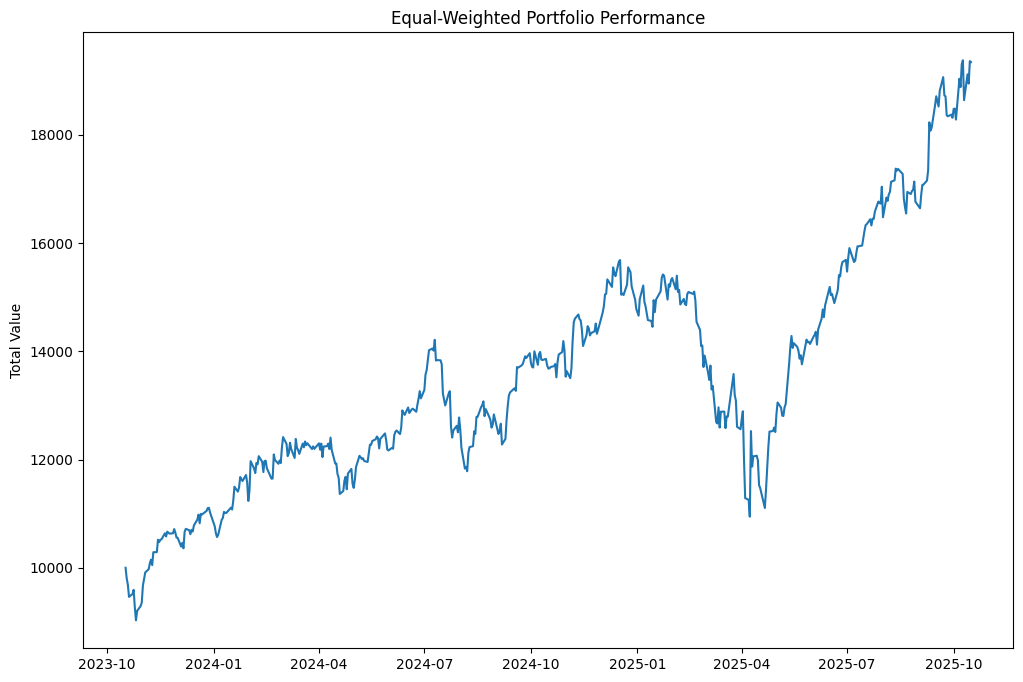

In [15]:
# View the total portfolio
plt.figure(figsize=(12, 8))

plt.plot(position_values['Total'])

plt.title('Equal-Weighted Portfolio Performance')
plt.ylabel('Total Value')
plt.show()

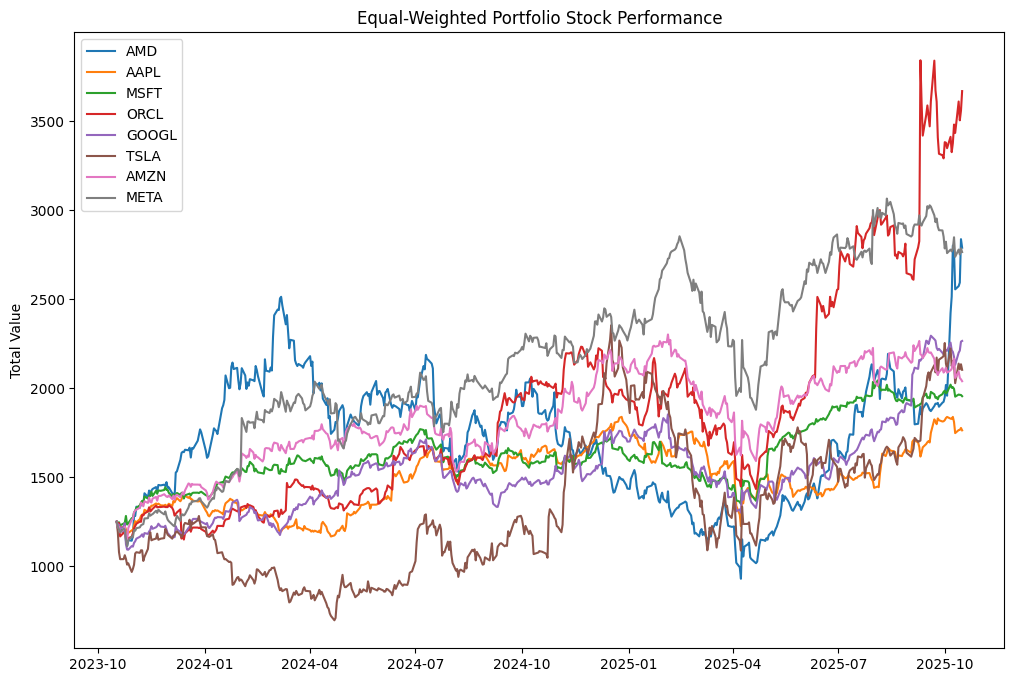

In [16]:
# View the stocks in the portfolio
plt.figure(figsize=(12, 8))

plt.plot(position_values.iloc[:,0:8])
plt.legend(position_values,loc="upper left", fontsize=10, frameon=True)

plt.title('Equal-Weighted Portfolio Stock Performance')
plt.ylabel('Total Value')
plt.show();

## Calculate Performance Metrics for the Portfolio
Now that we have created and visualized the equal-weighted portfolio, we can calculate a few metrics to further measure the performance of the portfolio. We will create five performances metrics:
 * Cumulative Return
 * Mean Daily Return
 * Standard Deviation Daily Return
 * Sharpe Ratio
 * Annualized Sharpe Ratio

In [17]:
# Define the end and start value of the portfolio
end_value = position_values['Total'].iloc[-1]
start_value = position_values['Total'].iloc[0]

In [18]:
# Calculate the cumulative portfolio return as a percentage
cumulative_return = end_value / start_value - 1

print('The cummulative return is', str(round(cumulative_return*100,2)), '%')

The cummulative return is 93.46 %


In [19]:
# Create a 'Daily Returns' column
position_values['Daily Return'] = position_values['Total'].pct_change().infer_objects(copy=False)

position_values.head()

AMD         AAPL         MSFT         ORCL        GOOGL  \
Date                                                                          
2023-10-17  1250.000000  1250.000000  1250.000000  1250.000000  1250.000000   
2023-10-18  1214.689923  1240.756465  1242.659571  1240.943910  1234.254398   
2023-10-19  1217.424412  1238.075025  1247.214163  1241.975445  1232.375268   
2023-10-20  1210.409908  1219.870091  1229.710154  1167.576222  1213.140677   
2023-10-23  1189.009924  1220.716935  1239.685758  1188.325492  1221.192306   

                   TSLA         AMZN         META         Total  Daily Return  
Date                                                                           
2023-10-17  1250.000000  1250.000000  1250.000000  10000.000000           NaN  
2023-10-18  1190.307960  1218.243741  1222.878162   9804.734129     -0.019527  
2023-10-19  1079.605628  1220.810762  1206.828860   9684.309563     -0.012282  
2023-10-20  1039.778303  1190.100375  1190.779321   9461.365050     -0.023021  
2023-10-23  1040.219721  1203.316312  1211.458409   9513.924857      0.005555

In [20]:
# Calculate the mean Daily Return 
mean_daily_return = position_values['Daily Return'].mean()

print('The mean daily return is:', str(round(mean_daily_return, 4)))

The mean daily return is: 0.0015


In [21]:
# Calculate the standard deviation of Daily Return 
std_daily_return = position_values['Daily Return'].std()

print('The std daily return is:', str(round(std_daily_return, 4)))

The std daily return is: 0.0171


### Sharpe Ratio
Now, let's explore a risk-adjusted return metric called the sharpe ratio. The sharpe ratio helps us quantify how much return we are getting by a given level of risk. When comparing two different investments against the same benchmark, the asset with the higher Sharpe ratio provides a higher return for the same amount of risk or the same return for a lower risk than the other asset. 

It is calculated by the average return of the portfolio minus a risk-free rate (such as government bonds), divided by the standard deviation of the return. In this case, we assume the risk-free rate is close to zero, so we won't add it to the formula.

In [22]:
# Calculate the sharpe ratio
# 5% annual ≈ 0.000198 daily considering only 252 business days
risk_free_rate = 0.05 / 252   
sharpe_ratio = (mean_daily_return - risk_free_rate) / std_daily_return

print(sharpe_ratio)

0.07402491933943167


In [23]:
# zero risk free rate
sharpe_ratio_zrf = mean_daily_return / std_daily_return
print(sharpe_ratio_zrf)

0.08564673706230788


In [24]:
# Calculate the annualized sharpe ratio
sharpe_ratio_annualized = sharpe_ratio * 252 ** 0.5

print(sharpe_ratio_annualized)

1.1751091643625116


## 📈 Portfolio Performance Summary (Equal-Weighted Tech Stocks)

1. Equal-Weighted Portfolio

This first portfolio was constructed by allocating an equal share of the investment to each stock. Key steps included:

	•	Normalizing adjusted closing prices to track growth from a common starting point.
	•	Allocating weights equally across the eight stocks (≈12.5% each).
	•	Computing portfolio position values and total value over time.

This provided a baseline for comparison, illustrating how an equally diversified portfolio evolves without optimization.

2. Performance Evaluation

The equal-weighted portfolio was evaluated using standard performance metrics:

	•	Cumulative Return: Overall portfolio growth relative to the starting value.
	•	Mean Daily Return: Average return per day.
	•	Volatility: Standard deviation of daily returns, representing risk.
	•	Sharpe Ratio: Risk-adjusted return, annualized by multiplying by √252.

In [25]:
print('Key Metrics: \n',
      'The cummulative return is', str(round(cumulative_return*100,2)),'% \n',
      'The mean daily return is:', str(round(mean_daily_return, 4)), '\n',
        'The std daily return is:', str(round(std_daily_return, 4)), '\n',
        'The sharpe ratio is:', str(round(sharpe_ratio, 4)), '\n',
        'Using zero risk free rate, the sharpe rato is:', str(round(sharpe_ratio_zrf, 4)), '\n',
        'The annualized sharpe rato is:', str(round(sharpe_ratio_annualized, 4)), '\n')

Key Metrics: 
 The cummulative return is 93.46 % 
 The mean daily return is: 0.0015 
 The std daily return is: 0.0171 
 The sharpe ratio is: 0.074 
 Using zero risk free rate, the sharpe rato is: 0.0856 
 The annualized sharpe rato is: 1.1751 



These metrics quantify both profitability and risk exposure.

### Risk & Exposure

This analysis evaluates an equal-weighted investment strategy using historical data from eight major technology companies: **AMD, Apple, Microsoft, Oracle, Google, Tesla, Amazon and Meta**.

### 🔹 Key Metrics

- **Cumulative Return**: indicates the *portfolio growth over the investment period*.

- **Mean Daily Return**: indicates the *average daily gain* showing consistent growth.

- **Standard Deviation (Daily)**: Reflects relatively high *volatility* typical of tech stocks.

- **Sharpe Ratio (Raw)**: is the *risk-adjusted return*, assuming a non-zero risk-free rate. The Sharpe ratio tells you how much return you get per unit of risk. A low value suggests a modest return compared to the risk.

- **Sharpe Ratio (Zero Risk-Free Rate)**: is the *risk-adjusted return*, assuming a zero risk-free rate. Same idea as above, but assuming zero risk-free rate. Still similar performance.

- **Annualized Sharpe Ratio**: Indicates the **risk-adjusted return** (Sharpe > 1 is generally considered acceptable).

### 🧠 Interpretation

- The portfolio delivered **strong absolute returns** with **moderate-to-high volatility**.
- The **Sharpe ratio suggests decent compensation for risk**, making this equal-weighted approach a solid baseline.
- There's potential to improve results through more advanced portfolio optimization strategies

✅ This equal-weighted tech portfolio serves as a **good benchmark** for comparing more sophisticated strategies.

## Optimizing Portfolio Weighting using Monte Carlo Simulation
To identify an optimal allocation, we employed Monte Carlo simulation within the framework of Modern Portfolio Theory (MPT):

* Monte Carlo Simulation: 10,000 random portfolios are generated by assigning random weight combinations to the eight stocks.
* For each simulated portfolio, expected annual return, volatility, and Sharpe ratio were computed.
* The process approximates the efficient frontier, that is, the set of portfolios that offer the highest return for a given level of risk.
* The portfolio with the maximum Sharpe ratio is the optimal allocation, representing the best risk-return trade-off.

### Preparing Scenarios
We need to prepare our data ahead of generating our scenarios to optimize the portfolio weighting. We will:
 * Create a dictionary containing the adjusted close for each of our stocks: stock_adj_close
 * Create another dictionary that transforms the adjusted close for each day to a percent change from the previous day.

In [26]:
# Create stock_adj_close dictionary
stock_adj_close = {}

stock_adj_close = pd.concat(
    {ticker: data['Adj Close'] for ticker, data in stocks.items()},
    axis=1)

In [27]:
# Convert the stock_adj_close dictionary to a DataFrame
stock_adj_close = pd.DataFrame(data = stock_adj_close)
stock_adj_close.columns = stock_adj_close.columns.droplevel(1)

# Ensure index is Date and sorted
stock_adj_close

AMD        AAPL        MSFT        ORCL       GOOGL  \
Date                                                                     
2023-10-17  105.139999  175.431656  327.130157  106.661766  138.762939   
2023-10-18  102.169998  174.134369  325.209137  105.889015  137.015015   
2023-10-19  102.400002  173.758041  326.401093  105.977036  136.806412   
2023-10-20  101.809998  171.203064  321.820221   99.628593  134.671173   
2023-10-23  100.010002  171.321915  324.430878  101.399117  135.564987   
...                ...         ...         ...         ...         ...   
2025-10-10  214.899994  245.270004  510.959991  292.959991  236.570007   
2025-10-13  216.419998  247.660004  514.049988  308.010010  244.149994   
2025-10-14  218.089996  247.770004  513.570007  299.000000  245.449997   
2025-10-15  238.600006  249.339996  513.429993  303.619995  251.029999   
2025-10-16  234.559998  247.449997  511.609985  313.000000  251.460007   

                  TSLA        AMZN        META  
Date                                            
2023-10-17  254.850006  131.470001  322.014862  
2023-10-18  242.679993  128.130005  315.027954  
2023-10-19  220.110001  128.399994  310.893463  
2023-10-20  211.990005  125.169998  306.758911  
2023-10-23  212.080002  126.559998  312.086090  
...                ...         ...         ...  
2025-10-10  413.489990  216.369995  705.299988  
2025-10-13  435.899994  220.070007  715.700012  
2025-10-14  429.239990  216.389999  708.650024  
2025-10-15  435.149994  215.570007  717.549988  
2025-10-16  428.750000  214.470001  712.070007  

[502 rows x 8 columns]

In [28]:
# Create stock_returns DataFrames to see the day over day change in stock value
stock_returns = stock_adj_close.pct_change()

stock_returns.head()

AMD      AAPL      MSFT      ORCL     GOOGL      TSLA  \
Date                                                                     
2023-10-17       NaN       NaN       NaN       NaN       NaN       NaN   
2023-10-18 -0.028248 -0.007395 -0.005872 -0.007245 -0.012596 -0.047754   
2023-10-19  0.002251 -0.002161  0.003665  0.000831 -0.001522 -0.093003   
2023-10-20 -0.005762 -0.014704 -0.014034 -0.059904 -0.015608 -0.036891   
2023-10-23 -0.017680  0.000694  0.008112  0.017771  0.006637  0.000425   

                AMZN      META  
Date                            
2023-10-17       NaN       NaN  
2023-10-18 -0.025405 -0.021697  
2023-10-19  0.002107 -0.013124  
2023-10-20 -0.025156 -0.013299  
2023-10-23  0.011105  0.017366

## Build & Run 10,000 Portfolio Scenarios
Now that we've prepared our data, we're almost ready to run our scenarios. First, we need to build the structures required to generate these scenarios and store the output. To do this, we will use the `numpy.zeros()` function. 

This function creates arrays that are filled with zeros. After we run the scenarios, we replace these zeros with the corresponding output. The reason we create the arrays with zeros first is to give our arrays the correct shape before we replace them with the correct values.

We will create four different arrays:
 * weights_array - this array will have 10,000 rows and 8 columns and hold the weighting allocation for each stock
 * returns_array - this array will contain the portfolio return for each scenario
 * volatility_array - this array will contain the portfolio volatility for each scenario
 * sharpe_array - this array will contain the sharpe ratio for each scenario

In [29]:
# Define the number of scenarios and create a blank array to populate stock weightings for each scenario
scenarios = 10000

weights_array = np.zeros((scenarios, len(stock_returns.columns)))

weights_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
# Create additional blank arrays for scenario output
returns_array = np.zeros(scenarios)
volatility_array = np.zeros(scenarios)
sharpe_array = np.zeros(scenarios)

In [31]:
import random
random.seed(3)
np.random.seed(3)

for index in range(scenarios): 
    # Generate random numbers for each index
    numbers = np.array(np.random.random(len(stock_returns.columns)))
    
    # Divide each number by the sum of the numbers to generate the random weight
    weights = numbers / np.sum(numbers)
    
    # Save the weights in weights_array
    weights_array[index,:] = weights
    
    # Calculate the return for each scenario
    returns_array[index] = np.sum(stock_returns.mean()*252*weights)
    
    # Calculate the expected volatility for each scenario
    volatility_array[index] = np.sqrt(np.dot(weights.T,np.dot(stock_returns.cov()*252, weights)))

    # Calculate the Sharpe Ratio for each scenario 
    sharpe_array[index] = returns_array[index] / volatility_array[index] if volatility_array[index] != 0 else 0

In [32]:
print("The first combination:", weights_array[0])

The first combination: [0.13168332 0.16930212 0.06954874 0.12212732 0.21348341 0.2142834
 0.03002461 0.04954708]


In [33]:
print("The sharpe ratio of the first portfolio:", sharpe_array[0])

The sharpe ratio of the first portfolio: 1.3769045701044704


## Identify the Optimal Portfolio
Now that we have the output for all 10,000 scenarios, we can identify the optimal portfolio. The optimal portfolio in this case study is the portfolio that has the highest sharpe ratio.

In [34]:
# Find the highest sharpe ratio in sharpe_array
print(sharpe_array.max())

1.6913109291891082


In [35]:
# Find the index of the optimal portfolio
index_max_sharpe = sharpe_array.argmax()
print(index_max_sharpe)

1794


In [36]:
# Print the optimal weights for each stock
print(stock_list)
print(weights_array[index_max_sharpe,:])

['AMD', 'AAPL', 'MSFT', 'ORCL', 'GOOGL', 'TSLA', 'AMZN', 'META']
[0.03464238 0.02834644 0.03788911 0.30020833 0.30229535 0.0152388
 0.04501537 0.23636423]


## Visualize the Optimal Portfolio & Portfolio Scenarios
Let's visualize our portfolio scenarios. 

### 📊 Portfolio Weight Allocation (Pie Chart)

The chart below shows the proportion of capital allocated to each stock in the Monte Carlo optimized portfolio.

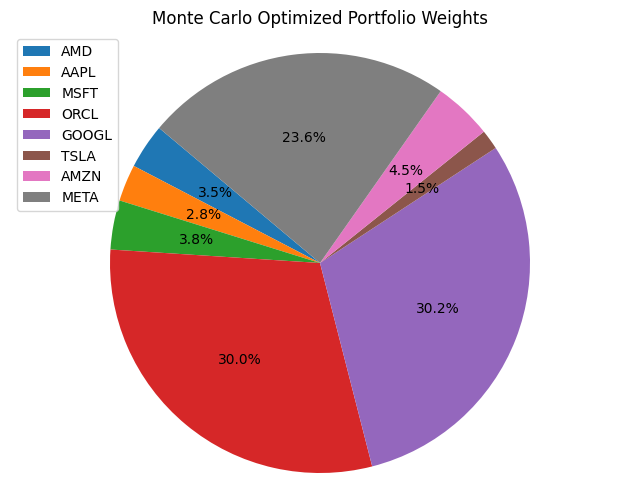

In [37]:
optimal_weights = weights_array[index_max_sharpe, :]

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(optimal_weights, autopct='%1.1f%%', startangle=140)
plt.legend(labels=stock_list, loc="upper left", fontsize=10)
plt.title('Monte Carlo Optimized Portfolio Weights')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Portfolio Visualization (scatter chart)
We can use the volatility and returns arrays on each axis to see the relationship between risk and reward. As a final step, we can visualize where the optimal portfolio appears among all of the scenarios.

In [38]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook'

max_sharpe_volatility = volatility_array[index_max_sharpe]
max_sharpe_return = returns_array[index_max_sharpe]

fig = px.scatter(
    x=volatility_array,
    y=returns_array,
    color=sharpe_array,
    color_continuous_scale='Viridis',
    labels={'x': 'Volatility (Risk)', 'y': 'Expected Return'},
    title="Portfolio Risk vs Return"
)

fig.add_scatter(
    x=[max_sharpe_volatility],
    y=[max_sharpe_return],
    mode='markers',
    marker=dict(color='red', size=12),
    name='Max Sharpe'
)

fig.update_coloraxes(colorbar_title="Sharpe Ratio")

fig.update_layout(
    template="plotly_white",
    title_x=0.5,
    font=dict(size=14),
    width=1000,
    height=700,
    coloraxis_colorbar=dict(
        title="Sharpe Ratio",
        len=0.9,         # shorten the colorbar (default is 1)
        y=0.5,           # center it vertically
        yanchor="middle" # anchor from the middle
    ),
    legend=dict(
        x=1.05, y=1,   # move legend slightly above the colorbar
        traceorder="normal",
        bgcolor="rgba(0,0,0,0)",
        bordercolor="rgba(0,0,0,0)"
    ),
    margin=dict(r=140)   # extra space on right
)

fig.show()


## Monte Carlo Optimized Portfolio Results

A Monte Carlo simulation was used to optimize a portfolio consisting of eight major technology stocks:

**Stocks**: `AMD`, `AAPL`, `MSFT`, `ORCL`, `GOOGL`, `TSLA`, `AMZN`, `META`

### Optimal Portfolio Weights
See the pie chart above.

### Performance Metric

- **Sharpe Ratio (Optimized)**:

The optimized Sharpe ratio indicates a **strong risk-adjusted return**, significantly higher than the equal-weighted portfolio benchmark. The optimization notably **reduces exposure to higher-volatility stocks** (e.g., AMD, TSLA) while emphasizing stable performers (GOOGL, ORCL, META).

✅ **Conclusion**:  
The Monte Carlo optimized portfolio delivers superior performance with a **better risk-return trade-off** compared to a simple equal-weighted strategy.